<a href="https://colab.research.google.com/github/rawalk/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [0]:
### YOUR CODE STARTS HERE

## pre-homework. 

-  this section is for setting up the python notebook for the remainder of the homework. 
   -  this means the libraries being imported. 
   -  this means plotting styles being defined.  
-  the homework adheres to the policy set for myself from the first sprint. 

In [0]:
# block of code that is normally copy pasted. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind

In [0]:
# block of code that helps format exploratory charts without much need to hardcode values later on. 
from matplotlib import style
style.use('fivethirtyeight')

## Goal 1: 

- Loading and cleaning the 1980's congressional voting data. 
- or determining the best methd to drop observations when runnings statistical tests. 

*Note that this data will involve **2 sample t-tests**, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.*

In [4]:
# need to wget the dataset. 

! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

# "--no-check-certificate" is for when you get the following error: when trying to just read_csv'ing the URL. 
# [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)

--2020-04-09 01:10:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-04-09 01:10:53 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# loading in the hw data file in a pandas dataframe. 
hw_data_df_dumb_way = pd.read_csv('house-votes-84.data')

In [9]:
# this illustrates a way to import the above data in a lazy way. 
hw_data_df_dumb_way.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [11]:
# the following way is taken from lecture. 
# and is the proper way to import the data into a pandas dataframe. 

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

hw_df = pd.read_csv('house-votes-84.data', 
                     header=None,
                     names=column_headers,
                     na_values='?')

hw_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [12]:
# looking at the above data set; we can see that doing descriptive statistics on "y" and "n" will be hard. 
# to solve this we re-code the votes as numeric values. 
# using a key / dictionary. 

hw_df_recode = hw_df.replace({'y':1, 'n':0})
hw_df_recode.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [16]:
# in order to accomplish goal 2; were going to need a dataframe that contains voting information separated by party.  
demo_vote_info = hw_df_recode[hw_df_recode['party']=='democrat']
rep_vote_info = hw_df_recode[hw_df_recode['party']=='republican']

# visualization of the democrat df. 
demo_vote_info.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [17]:
# visualization of the republican df. 
rep_vote_info.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


### Visualization of the voting conditions. 
| **Equal**           | **More Yes's**    | **More No's** |
|-----------------|---------------|-----------|
| Water Project   | Crime         | Synfuels  |
| el salvador aid | South Africa  | Education |
| mx-missile      | aid-to-contra | duty-free |
| immigration     |               |           |
| right-to-use    |               |           |

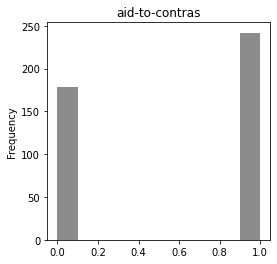

In [106]:
# way to visualize projects and votes. 
hw_df_recode['aid-to-contras'].plot(kind='hist', figsize=(4,4), color='gray', alpha=0.9, title='aid-to-contras');
# (0:1 == equal yes than no's)
# aid to contras
#axs[0].rep_vote_info['aid-to-contras'].plot(kind='hist', figsize=(4,4), color='gray', alpha=0.7, title='aid-to-contras');
#axs[1].demo_vote_info['aid-to-contras'].plot(kind='hist', figsize=(4,4), color='white', alpha=0.7, title='aid-to-contras');
# (0:1 == more yes than no's)


In [0]:
###
###fig, axs = plt.subplots(2)
###fig.suptitle('Vertically stacked subplots')
###plot.hist().demo_vote_info['aid-to-contras'].value_counts().sort_index()
###axs[1].rep_vote_info['aid-to-contras'].value_counts().sort_index().plot.hist
###



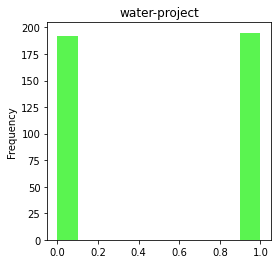

In [63]:
hw_df_recode['water-project'].plot(kind='hist', figsize=(4,4), color='#48F33D', alpha=0.9, title='water-project');
# (0:1 == equal yes than no's)

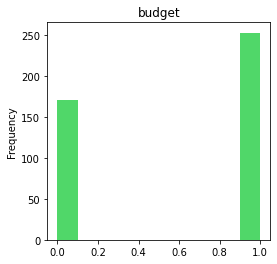

In [64]:
hw_df_recode['budget'].plot(kind='hist', figsize=(4,4), color='#3DD359', alpha=0.9, title='budget');
# (0:1 == more yes than no's)

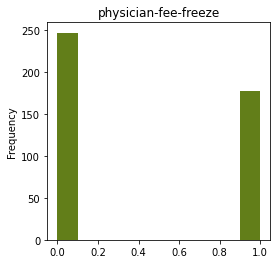

In [65]:
hw_df_recode['physician-fee-freeze'].plot(kind='hist', figsize=(4,4), color='#517000', alpha=0.9, title='physician-fee-freeze');
# (0:1 == more no than yes's)

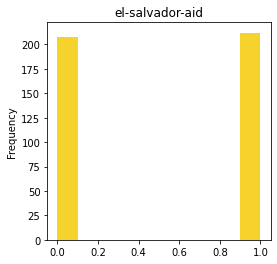

In [66]:
hw_df_recode['el-salvador-aid'].plot(kind='hist', figsize=(4,4), color='#F6CD16', alpha=0.9, title='el-salvador-aid');
# (0:1 == equal yes than no's)

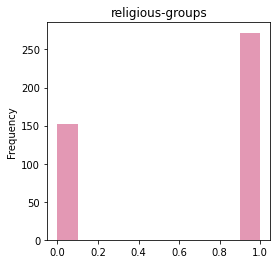

In [67]:
hw_df_recode['religious-groups'].plot(kind='hist', figsize=(4,4), color='#E08DAC', alpha=0.9, title='religious-groups');
# (0:1 == more yes than no's)

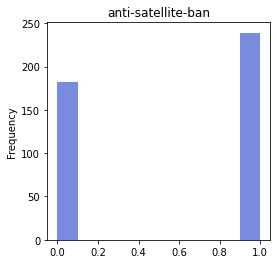

In [68]:
hw_df_recode['anti-satellite-ban'].plot(kind='hist', figsize=(4,4), color='#6A7FDB', alpha=0.9, title='anti-satellite-ban');
# (0:1 == more yes than no's)

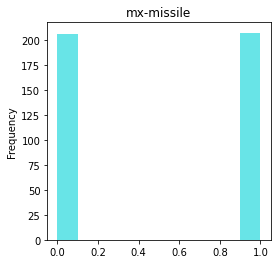

In [69]:
hw_df_recode['mx-missile'].plot(kind='hist', figsize=(4,4), color='#57E2E5', alpha=0.9, title='mx-missile');
# (0:1 == equal yes than no's)

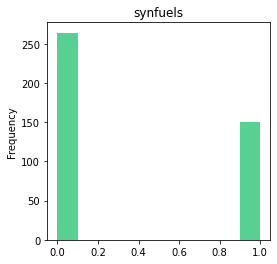

In [70]:
hw_df_recode['synfuels'].plot(kind='hist', figsize=(4,4), color='#45CB85', alpha=0.9, title='synfuels');
# (0:1 == more no's than yes's)

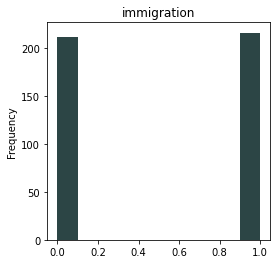

In [71]:
hw_df_recode['immigration'].plot(kind='hist', figsize=(4,4), color='#153131', alpha=0.9, title='immigration');
# (0:1 == equal yes to no's)

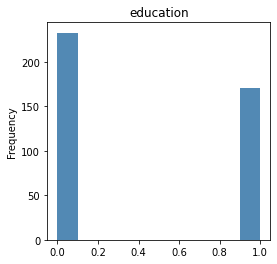

In [72]:
hw_df_recode['education'].plot(kind='hist', figsize=(4,4), color='#3F7CAC', alpha=0.9, title='education');
# (0:1 == more no's than yes's)

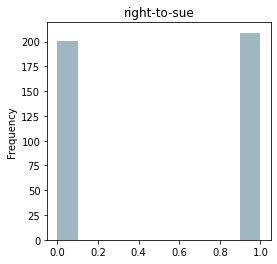

In [73]:
hw_df_recode['right-to-sue'].plot(kind='hist', figsize=(4,4), color='#95AFBA', alpha=0.9, title='right-to-sue');
# (0:1 == equal yes to no's)

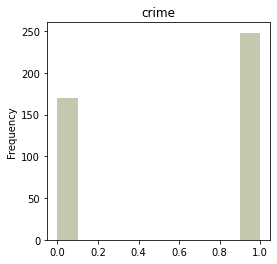

In [74]:
hw_df_recode['crime'].plot(kind='hist', figsize=(4,4), color='#BDC4A7', alpha=0.9, title='crime');
# (0:1 == more yes than no's)

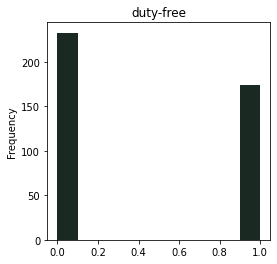

In [75]:
hw_df_recode['duty-free'].plot(kind='hist', figsize=(4,4), color='#01110A', alpha=0.9, title='duty-free');
# (0:1 == more no's than yes's)

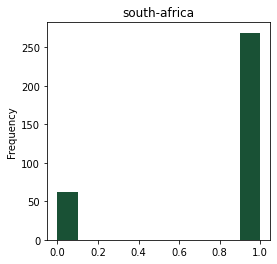

In [76]:
hw_df_recode['south-africa'].plot(kind='hist', figsize=(4,4), color='#003E1F', alpha=0.9, title='south-africa');
# (0:1 == more yes than no's)

In [0]:
# sns.pairplot(hw_df_recode, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [0]:
#pd.plotting.scatter_matrix(hw_df_recode, alpha=0.2, figsize=(20,20));



## Goal 2: 

- Using hypothesis testing, find an issue that *democrats support more than republicans* with **p < 0.01**

**Null Hypothesis:** 

There is no difference between average voting rates (levels of support) for the **south-africa** bill between democrats and republicans in the house of representatives. (support is equal)

𝑥¯1==𝑥¯2 
Where  𝑥¯1  is the mean of republican votes and  𝑥¯2  is the mean of democrat votes.

**Alternative Hypothesis:**

𝑥¯1≠𝑥¯2 
Levels of support between the two parties will differ.

*Note that this data will involve **2 sample t-tests**, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis. 95% Confidence Level*

In [110]:
# code here

a_x = demo_vote_info['south-africa'].mean()
b_x = rep_vote_info['south-africa'].mean()

a = demo_vote_info['south-africa']
b = rep_vote_info['south-africa']

ttest_ind(a, b, nan_policy='omit').pvalue

3.652674361672226e-11

## Goal 3: 

- Using hypothesis testing, find an issue that *republicans support more than democrats* with **p < 0.01**

*Note that this data will involve **2 sample t-tests**, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.*

In [0]:
# code here

## Goal 4: 

- Using hypothesis testing, find an issue where *the difference between republicans and democrats* has **p > 0.1** (i.e. there may not be much of a difference)

*Note that this data will involve **2 sample t-tests**, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.*

In [0]:
# code here 

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!